# Comparación de Modelos para Predicción de Arrestos

**NOTA**: Este notebook compara todos los modelos entrenados para predecir arrestos. Las métricas se cargan desde archivos JSON generados por los notebooks `machine_learning.ipynb` y `deep_learning.ipynb`. Asegúrate de ejecutar esos notebooks primero para generar los archivos JSON.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar funciones auxiliares
from helpers import load_all_metrics, get_model_color

sns.set()

## Carga de Métricas desde JSON

Las métricas se cargan automáticamente desde los archivos JSON generados por los notebooks de entrenamiento.

In [52]:
# Cargar todas las métricas desde archivos JSON
all_metrics = load_all_metrics("./metricas")

print(f"Se cargaron {len(all_metrics)} modelos desde archivos JSON:")
for model_name in all_metrics.keys():
    print(f"  - {model_name}")

# Convertir a DataFrame para facilitar el análisis
df_all = pd.DataFrame(all_metrics).T

# Verificar que se cargaron correctamente
print(f"\n{df_all.shape[0]} modelos cargados con {df_all.shape[1]} métricas cada uno")
print("\nPrimeras filas:")
print(df_all.head())

Se cargaron 10 modelos desde archivos JSON:
  - XGBoost
  - Bagging (LR)
  - Arbol de Decision
  - Regresion Logistica
  - K-Nearest Neighbors
  - Deep Learning (Base)
  - SVM Linear
  - Deep Learning (Class Weighting)
  - AdaBoost
  - Random Forest

10 modelos cargados con 10 métricas cada uno

Primeras filas:
                              model_name  Accuracy Precision    Recall  \
XGBoost                          XGBoost  0.911477  0.904162  0.911477   
Bagging (LR)                Bagging (LR)  0.664433  0.824587  0.664433   
Arbol de Decision      Arbol de Decision  0.844001  0.862566  0.844001   
Regresion Logistica  Regresion Logistica  0.664059  0.824778  0.664059   
K-Nearest Neighbors  K-Nearest Neighbors   0.75871  0.804911   0.75871   

                     F1-Score       AUC MCC score Entrenamiento (s)  \
XGBoost              0.903642  0.886424  0.579594          0.290703   
Bagging (LR)         0.715292  0.672068  0.212191          0.290703   
Arbol de Decision    0.851817

In [53]:
df_all_sorted = df_all.sort_values('F1-Score', ascending=False)

print("="*100)
print("COMPARACIÓN DE TODOS LOS MODELOS")
print("="*100)
print(df_all_sorted.to_string())

print("\n" + "="*100)
print("MEJORES MODELOS POR MÉTRICA")
print("="*100)
print(f"Mejor Accuracy:   {df_all['Accuracy'].idxmax()} ({df_all['Accuracy'].max():.4f})")
print(f"Mejor Precision:  {df_all['Precision'].idxmax()} ({df_all['Precision'].max():.4f})")
print(f"Mejor Recall:     {df_all['Recall'].idxmax()} ({df_all['Recall'].max():.4f})")
print(f"Mejor F1-Score:   {df_all['F1-Score'].idxmax()} ({df_all['F1-Score'].max():.4f})")
print(f"Mejor AUC:        {df_all['AUC'].idxmax()} ({df_all['AUC'].max():.4f})")
print(f"Mejor MCC:        {df_all['MCC score'].idxmax()} ({df_all['MCC score'].max():.4f})")

COMPARACIÓN DE TODOS LOS MODELOS
                                                      model_name  Accuracy Precision    Recall  F1-Score       AUC MCC score Entrenamiento (s) Predicción (s) Tiempo Total (s)
XGBoost                                                  XGBoost  0.911477  0.904162  0.911477  0.903642  0.886424  0.579594          0.290703        0.00516         0.295863
Random Forest                                      Random Forest  0.896007  0.888714  0.896007  0.891268  0.852146  0.526161          5.254502        0.03535         5.289852
AdaBoost                                                AdaBoost  0.890391  0.882458  0.890391  0.885349  0.862633   0.49987          0.290703        0.00516         0.295863
Arbol de Decision                              Arbol de Decision  0.844001  0.862566  0.844001  0.851817  0.735013  0.415174          4.677076       0.139334          4.81641
Deep Learning (Base)                        Deep Learning (Base)  0.819388  0.859473  0.8193

# Comparación Completa: Todos los Modelos

In [54]:
# Eliminar la columna model_name duplicada (ya está en el índice)
df_display = df_all_sorted.drop(columns=['model_name'])

df_display.style.background_gradient(cmap='RdYlGn', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'MCC score']).format({
    'Accuracy': '{:.2%}',
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}',
    'AUC': '{:.2%}',
    'MCC score': '{:.2%}',
    'Entrenamiento (s)': '{:.3f}',
    'Predicción (s)': '{:.3f}',
    'Tiempo Total (s)': '{:.3f}'
})

,Accuracy,Precision,Recall,F1-Score,AUC,MCC score,Entrenamiento (s),Predicción (s),Tiempo Total (s)
XGBoost,91.15%,90.42%,91.15%,90.36%,88.64%,57.96%,0.291,0.005,0.296
Random Forest,89.60%,88.87%,89.60%,89.13%,85.21%,52.62%,5.255,0.035,5.290
AdaBoost,89.04%,88.25%,89.04%,88.53%,86.26%,49.99%,0.291,0.005,0.296
Arbol de Decision,84.40%,86.26%,84.40%,85.18%,73.50%,41.52%,4.677,0.139,4.816
Deep Learning (Base),81.94%,85.95%,81.94%,83.47%,83.77%,39.29%,199.457,0.128,199.585
Deep Learning (Class Weighting),76.82%,86.03%,76.82%,79.83%,83.22%,36.90%,219.163,0.128,219.291
K-Nearest Neighbors,75.87%,80.49%,75.87%,77.85%,64.38%,17.06%,0.054,0.353,0.407
Bagging (LR),66.44%,82.46%,66.44%,71.53%,67.21%,21.22%,0.291,0.005,0.296
Regresion Logistica,66.41%,82.48%,66.41%,71.50%,67.21%,21.27%,0.230,0.001,0.231
SVM Linear,65.90%,82.61%,65.90%,71.11%,67.25%,21.49%,0.075,0.002,0.077


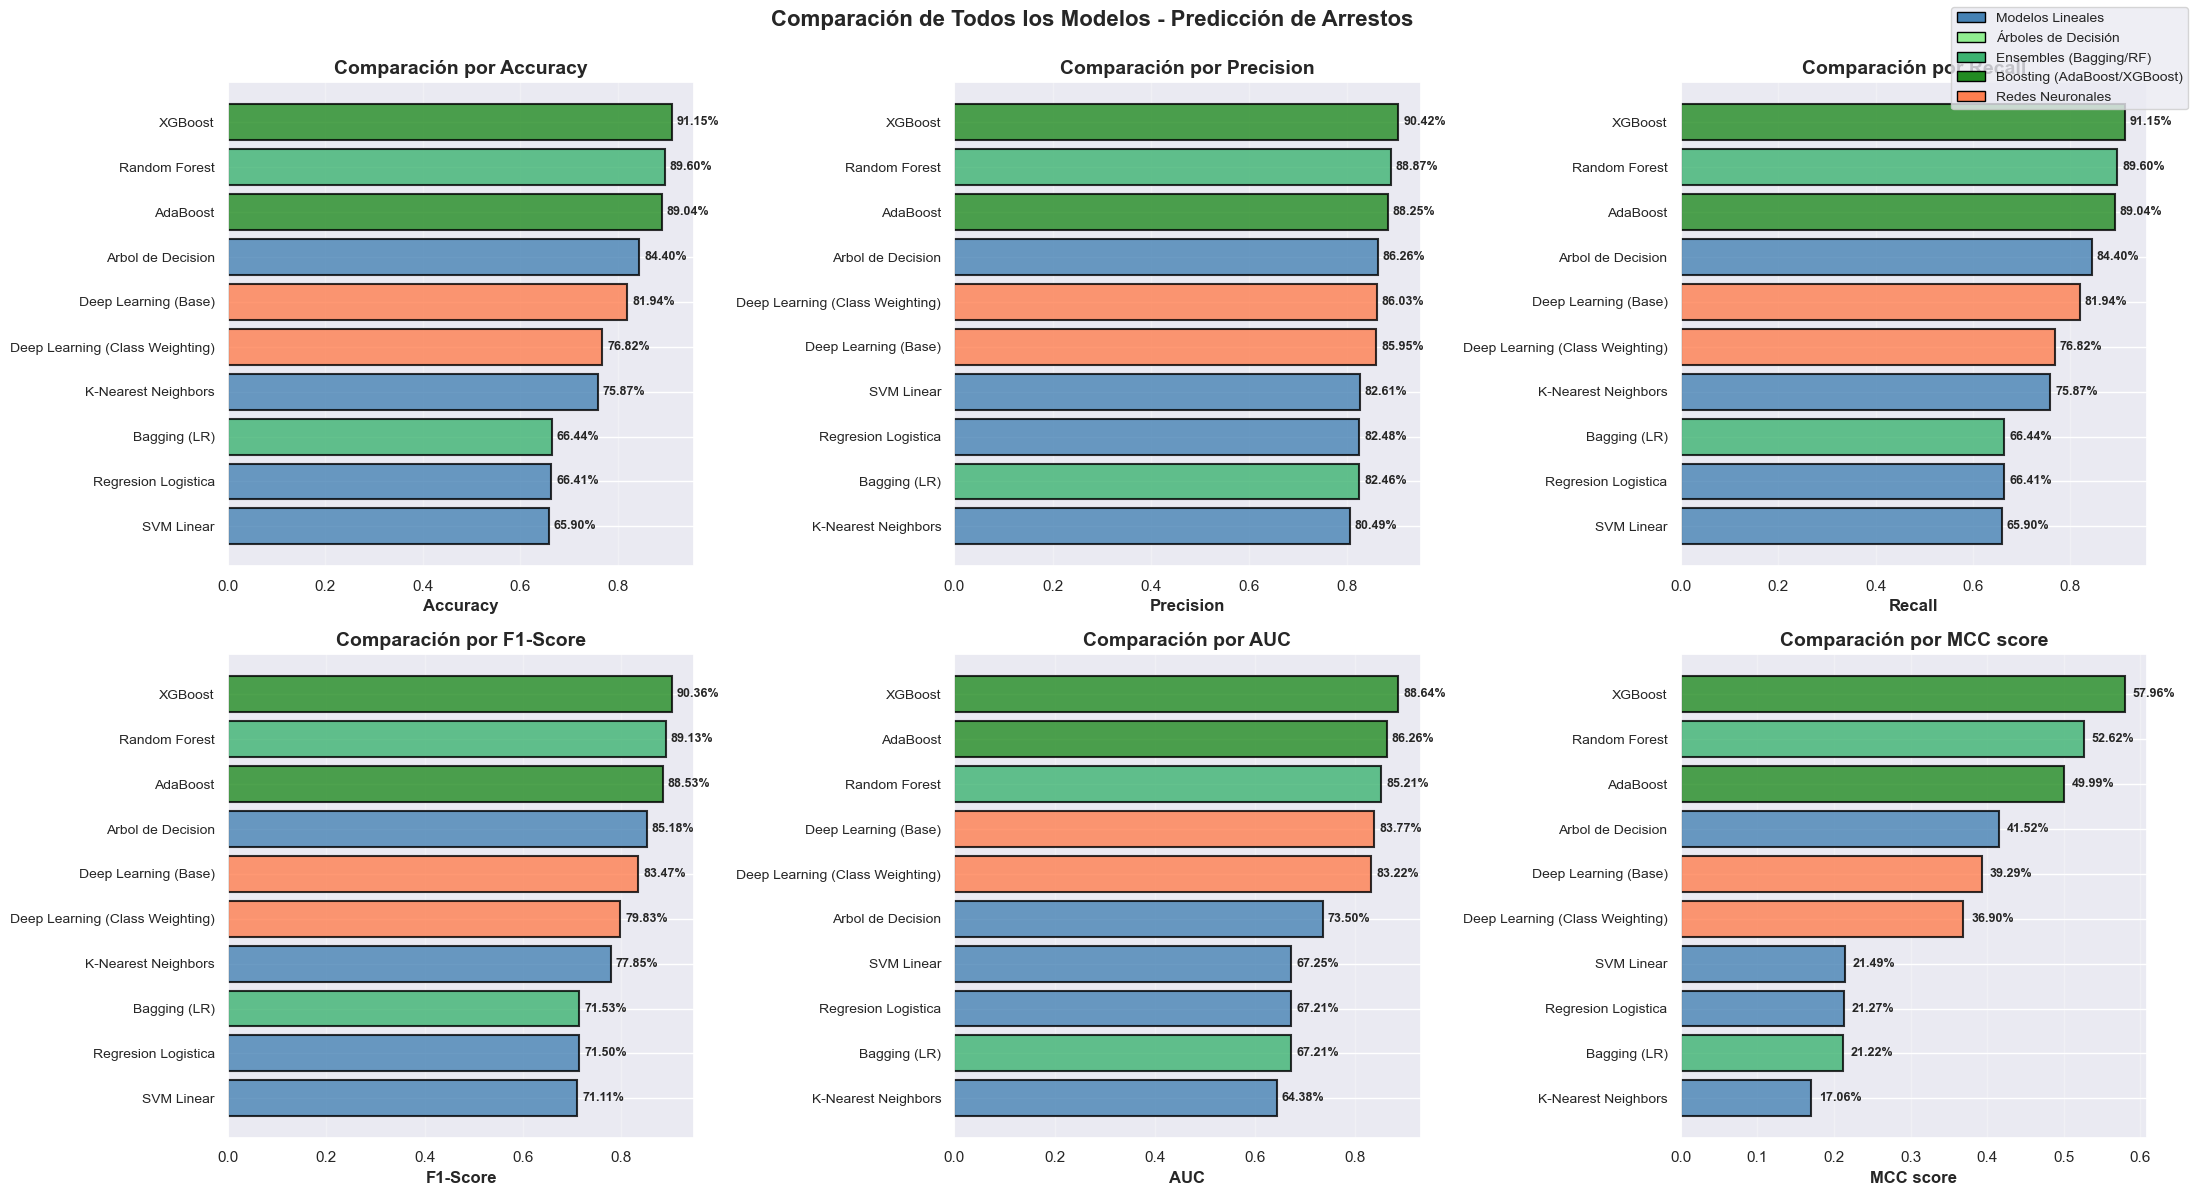

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'MCC score']

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    # Ordenar datos de mayor a menor para cada métrica
    data = df_all_sorted[metric].dropna().sort_values(ascending=True)
    
    # Asignar colores según el modelo
    model_colors = [get_model_color(name) for name in data.index]
    
    bars = ax.barh(range(len(data)), data.values, 
                   color=model_colors,
                   alpha=0.8, edgecolor='black', linewidth=1.5)
    
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index, fontsize=10)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Comparación por {metric}', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Agregar valores
    for i, (bar, val) in enumerate(zip(bars, data.values)):
        ax.text(val + 0.01, i, f'{val:.2%}', va='center', fontsize=9, fontweight='bold')

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', edgecolor='black', label='Modelos Lineales'),
    Patch(facecolor='lightgreen', edgecolor='black', label='Árboles de Decisión'),
    Patch(facecolor='mediumseagreen', edgecolor='black', label='Ensembles (Bagging/RF)'),
    Patch(facecolor='forestgreen', edgecolor='black', label='Boosting (AdaBoost/XGBoost)'),
    Patch(facecolor='coral', edgecolor='black', label='Redes Neuronales')
]
fig.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.suptitle('Comparación de Todos los Modelos - Predicción de Arrestos', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Análisis de Tiempos de Entrenamiento

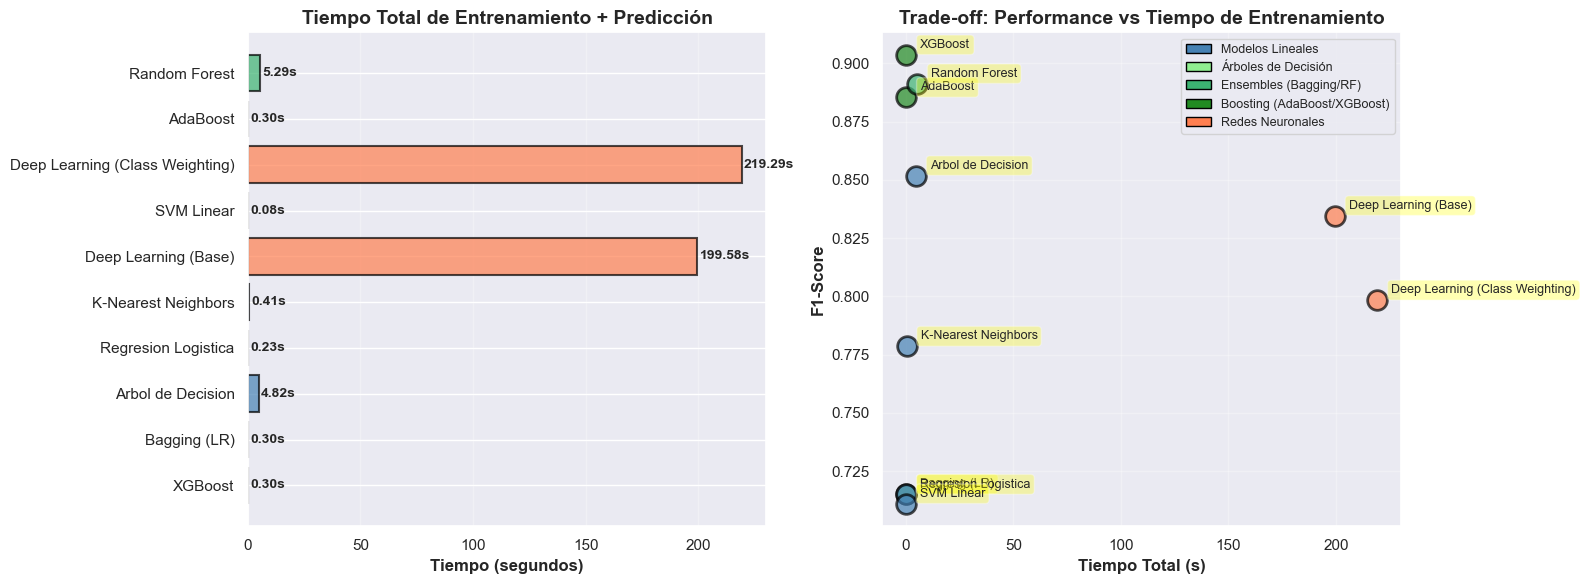

In [56]:
df_time = df_all.dropna(subset=['Tiempo Total (s)'])

model_colors = [get_model_color(name) for name in df_time.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
bars = ax1.barh(range(len(df_time)), df_time['Tiempo Total (s)'].values,
                color=model_colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(df_time)))
ax1.set_yticklabels(df_time.index)
ax1.set_xlabel('Tiempo (segundos)', fontsize=12, fontweight='bold')
ax1.set_title('Tiempo Total de Entrenamiento + Predicción', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, df_time['Tiempo Total (s)'].values)):
    ax1.text(val + 1, i, f'{val:.2f}s', va='center', fontsize=10, fontweight='bold')

ax2 = axes[1]

for name in df_time.index:
    color = get_model_color(name)
    ax2.scatter(df_time.loc[name, 'Tiempo Total (s)'], 
               df_time.loc[name, 'F1-Score'],
               s=200, c=color, alpha=0.7, edgecolors='black', linewidth=2)

for idx, name in enumerate(df_time.index):
    ax2.annotate(name, 
                (df_time['Tiempo Total (s)'].iloc[idx], df_time['F1-Score'].iloc[idx]),
                xytext=(10, 5), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', edgecolor='black', label='Modelos Lineales'),
    Patch(facecolor='lightgreen', edgecolor='black', label='Árboles de Decisión'),
    Patch(facecolor='mediumseagreen', edgecolor='black', label='Ensembles (Bagging/RF)'),
    Patch(facecolor='forestgreen', edgecolor='black', label='Boosting (AdaBoost/XGBoost)'),
    Patch(facecolor='coral', edgecolor='black', label='Redes Neuronales')
]
ax2.legend(handles=legend_elements, loc='best', fontsize=9)

ax2.set_xlabel('Tiempo Total (s)', fontsize=12, fontweight='bold')
ax2.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax2.set_title('Trade-off: Performance vs Tiempo de Entrenamiento', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Gráfico de Radar: Top 5 Modelos

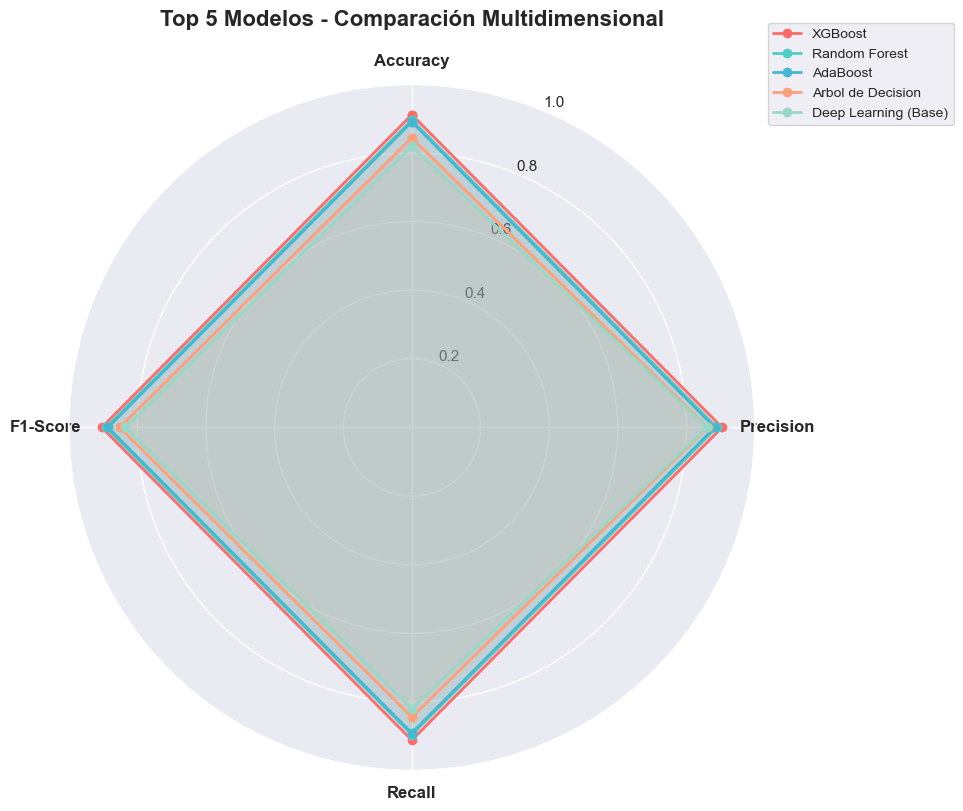

In [57]:
from math import pi

# Seleccionar top 5 modelos por F1-Score
top5 = df_all_sorted.head(5)

# Métricas para el radar
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)

# Crear el gráfico de radar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

# Graficar cada modelo
colors_radar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
for idx, (model_name, row) in enumerate(top5.iterrows()):
    values = [row[cat] for cat in categories]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors_radar[idx])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

ax.set_ylim(0, 1)
ax.set_title('Top 5 Modelos - Comparación Multidimensional', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()

# Conclusiones

### Análisis General:
- Los **modelos de Boosting** (XGBoost, AdaBoost) tienden a tener el mejor balance entre métricas
- Los **modelos de redes neuronales** pueden lograr mejor recall para detectar arrestos, útil si el objetivo es maximizar la detección
- Los **modelos lineales** (Regresión Logística, SVM) son los más rápidos pero pueden tener menor performance
- **Random Forest** ofrece un buen balance entre performance y interpretabilidad

### Recomendaciones según el Caso de Uso:

**1. Para producción (mejor balance general)**
   - Modelo recomendado: El que tenga mejor F1-Score
   - Considerar también el tiempo de entrenamiento y predicción

**2. Para maximizar detección de arrestos (priorizar Recall)**
   - Modelo recomendado: El que tenga mayor Recall
   - Aceptable si baja un poco la Precision (más falsos positivos)

**3. Para prototipado rápido**
   - Modelo recomendado: Regresión Logística o SVM Linear
   - Muy rápidos de entrenar y predecir

**4. Para interpretabilidad**
   - Modelo recomendado: Árbol de Decisión o Regresión Logística
   - Más fácil entender qué features influyen en la predicción